#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

#### Importing the Dataset

In [3]:
dataset = pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])

In [4]:
dataset.dropna(inplace=True)

In [5]:
dataset.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
x = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

#### Splitting the data into train and test data

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 16)

#### Applying Algorithm and Checking Accuracy

In [8]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [9]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.6153846153846154

#### Applying Binning to increase Accuracy

In [10]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [11]:
trf = ColumnTransformer([
    ('first', kbin_age,[0]),
    ('second', kbin_fare,[1])
])

In [12]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

#### Checking how the bins are formed

In [13]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_transformed[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_transformed[:,1]
})

In [14]:
output['age_labels'] = pd.cut(x=x_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())



In [15]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
408,21.0,4.0,7.7750,2.0,"(19.0, 21.0]","(7.229, 7.775]"
227,20.5,3.0,7.2500,1.0,"(19.0, 21.0]","(7.229, 7.775]"
434,50.0,13.0,55.9000,12.0,"(47.0, 54.0]","(47.1, 66.6]"
146,27.0,6.0,7.7958,2.0,"(25.0, 28.0]","(7.775, 7.896]"
183,1.0,0.0,39.0000,11.0,"(0.67, 7.0]","(31.275, 47.1]"


In [16]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train_transformed, y_train)

DecisionTreeClassifier()

In [17]:
y_pred2 = classifier.predict(x_test_transformed)
accuracy_score(y_test, y_pred2)

0.6713286713286714

#### Comaprison after using Binning

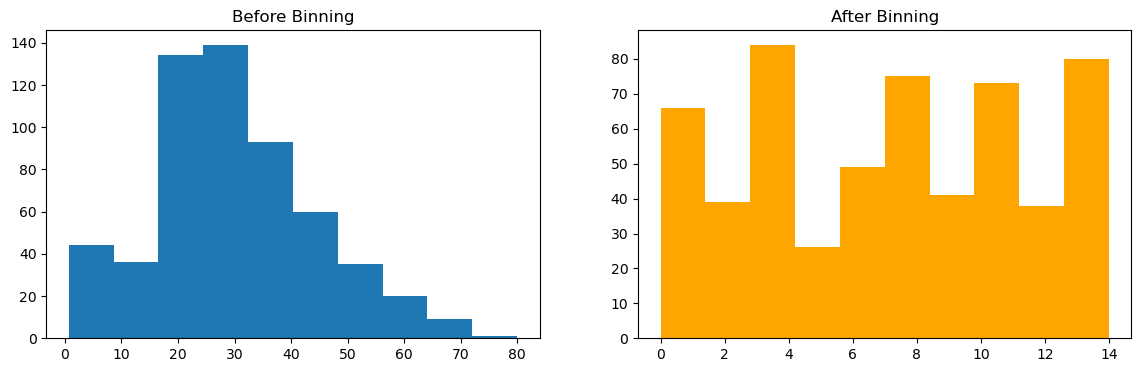

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(x_train['Age'])
plt.title("Before Binning")

plt.subplot(122)
plt.hist(x_train_transformed[:,0],color='orange')
plt.title("After Binning")

plt.show()

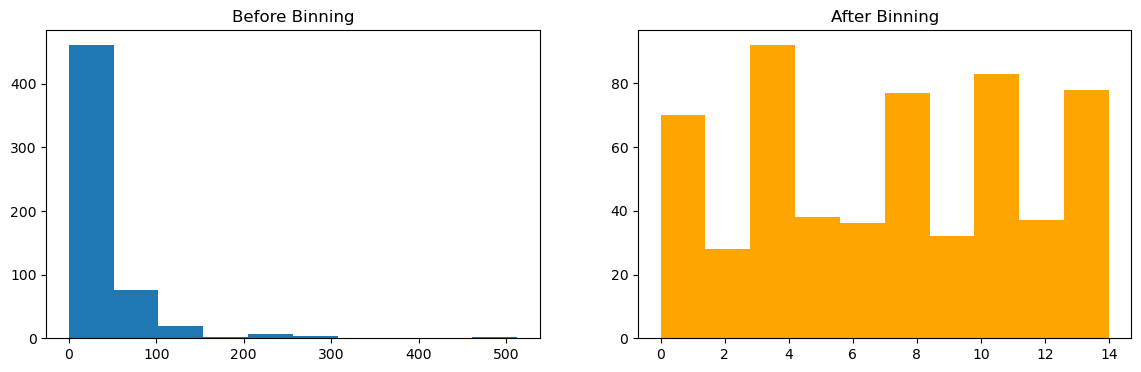

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(x_train['Fare'])
plt.title("Before Binning")

plt.subplot(122)
plt.hist(x_train_transformed[:,1],color='orange')
plt.title("After Binning")

plt.show()